In [1]:
import numpy as np
import pandas as pd
from shapely import Point, LineString, Polygon
from shapely import wkt

import ast
import utm

from geo_calculator import get_area_and_distance

In [2]:
def get_bounds_from_string(field_bounds_str : str):
    """
    convert string representation of the bounds into list
    :param field_bounds_str: string representation of the bounds
    :return: list of bounds of the subfields
    """
    if field_bounds_str[:4] == '[[[[':
        field_bounds_str = field_bounds_str.replace('[[[', '[[').replace(']]]', ']]')
    field_bounds = ast.literal_eval(field_bounds_str) 
    return field_bounds

Test

In [3]:
df = pd.read_csv('../fields-data/new_fields_500.csv')
field_bounds_str = df.iloc[5]['geometry_coordinates']
field_bounds_str[:30]

'[[[[24.547178806,50.039277761,'

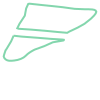

In [4]:
bound_path = np.array(get_bounds_from_string(field_bounds_str)[0])[:,:2]
bound_path2 = np.array(get_bounds_from_string(field_bounds_str)[1])[:,:2]
LineString(bound_path).union(LineString(bound_path2))

In [5]:
field_bounds_str = [
    np.array(get_bounds_from_string(field_bounds_str)[0])[:, :2][:,::-1],
    np.array(get_bounds_from_string(field_bounds_str)[1])[:, :2][:,::-1]
]

In [6]:
len(bound_path)

31

In [7]:
# start_point = np.array([50.067829, 23.983841])[::-1]
path = np.concatenate([
    np.linspace([50.041046, 24.544801], [50.040669, 24.548822], 300),
    np.linspace([50.040497, 24.548638], [50.040834, 24.544704], 300),
    np.linspace([50.040605, 24.544640], [50.040235, 24.548363], 300),
    np.linspace([50.040019, 24.548111], [50.040353, 24.544593], 300),
    np.linspace([50.040113, 24.544453], [50.039806, 24.547839], 300),
    np.linspace([50.039593, 24.547494], [50.039902, 24.544301], 300),
    np.linspace([50.039763, 24.544219], [50.039473, 24.547330], 300)
])


diff_lat = np.random.uniform(-0.000002, 0.000002, 2100)*2
diff_lon = np.random.uniform(-0.000001, 0.000001, 2100)*2
# diff_lon = np.zeros(2100)

# path = [start_point]
# for dx, dy in zip(diff_x, diff_y):
#     path.append(path[-1] + np.array([dx, dy]))
# path = np.array(path)

# linepath = LineString(path)
# linepath.union(LineString(bound_path))
path = path + np.array([diff_lat, diff_lon]).T

# Time test for 3 consecutive 300-coordinate tracks 

In [8]:
path = path[:,::-1]

In [9]:
# parameters
# path = bound_path

track_len = 300

tool_width = 10
time = np.ones(track_len)

track_lon, track_lat = list(path[:track_len].T)

In [10]:
len(path)

2100

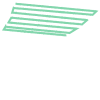

In [11]:
LineString(path+np.array([diff_lat, diff_lon]).T)

## First 300 coords

In [12]:
%%time
first_300 = get_area_and_distance(
    tool_width=tool_width,
    gps_m_deviation=1,
    
    time=time,
    track_lat=track_lat,
    track_lon=track_lon,
    
    field_bounds=field_bounds_str
)

CPU times: user 133 ms, sys: 3.04 ms, total: 136 ms
Wall time: 135 ms


## Second 300 coords

In [13]:
track_lon, track_lat = path[track_len : track_len*2].T
# track_lon, track_lat = path[track_len : ].T

In [14]:
%%time
second_300 = get_area_and_distance(
    tool_width=tool_width,
    gps_m_deviation=1,
    
    time=track_lat,
    track_lat=track_lat,
    track_lon=track_lon,
    
    field_bounds=field_bounds_str,
    encoded_field_polygon=first_300['encoded_field_polygon'],
    encoded_calculated_track=first_300['encoded_calculated_track'],
    gps_geozone_num=first_300['gps_geozone_num'],
    gps_geozone_let=first_300['gps_geozone_let'],
    last_point_xy=first_300['last_point_xy'],
    last_path_distance=first_300['path_distance'][-1],
)

CPU times: user 133 ms, sys: 1.61 ms, total: 135 ms
Wall time: 134 ms


## Third 300 coords

In [15]:
track_lon, track_lat = path[track_len*2 :track_len*3].T
time = track_lon

In [16]:
%%time
third_300 = get_area_and_distance(
    tool_width=tool_width,
    gps_m_deviation=1,
    
    time=time,
    track_lat=track_lat,
    track_lon=track_lon,
    
    field_bounds=field_bounds_str,
    encoded_field_polygon=second_300['encoded_field_polygon'],
    encoded_calculated_track=second_300['encoded_calculated_track'],
    gps_geozone_num=second_300['gps_geozone_num'],
    gps_geozone_let=second_300['gps_geozone_let'],
    last_point_xy=second_300['last_point_xy'],
    last_path_distance=second_300['path_distance'][-1],
)

CPU times: user 164 ms, sys: 2.27 ms, total: 166 ms
Wall time: 165 ms


## Fourth 300 coords

In [17]:
track_lon, track_lat = path[track_len*3 :track_len*4].T
time = track_lon

In [18]:
%%time
fourth_300 = get_area_and_distance(
    tool_width=tool_width,
    gps_m_deviation=1,
    
    time=time,
    track_lat=track_lat,
    track_lon=track_lon,
    
    field_bounds=field_bounds_str,
    encoded_field_polygon=third_300['encoded_field_polygon'],
    encoded_calculated_track=third_300['encoded_calculated_track'],
    gps_geozone_num=third_300['gps_geozone_num'],
    gps_geozone_let=third_300['gps_geozone_let'],
    last_point_xy=third_300['last_point_xy'],
    last_path_distance=third_300['path_distance'][-1],
)

CPU times: user 153 ms, sys: 1.95 ms, total: 155 ms
Wall time: 154 ms


## Fifth 300 coords

In [19]:
track_lon, track_lat = path[track_len*4 :track_len*5].T
time = track_lon

In [20]:
%%time
fifth_300 = get_area_and_distance(
    tool_width=tool_width,
    gps_m_deviation=1,
    
    time=time,
    track_lat=track_lat,
    track_lon=track_lon,
    
    field_bounds=field_bounds_str,
    encoded_field_polygon=fourth_300['encoded_field_polygon'],
    encoded_calculated_track=fourth_300['encoded_calculated_track'],
    gps_geozone_num=fourth_300['gps_geozone_num'],
    gps_geozone_let=fourth_300['gps_geozone_let'],
    last_point_xy=fourth_300['last_point_xy'],
    last_path_distance=fourth_300['path_distance'][-1],
)

CPU times: user 145 ms, sys: 2.55 ms, total: 148 ms
Wall time: 157 ms


## Sixth 300 coords

In [21]:
track_lon, track_lat = path[track_len*5 :track_len*6].T
time = track_lon

In [22]:
%%time
sixth_300 = get_area_and_distance(
    tool_width=tool_width,
    gps_m_deviation=1,
    
    time=time,
    track_lat=track_lat,
    track_lon=track_lon,
    
    field_bounds=field_bounds_str,
    encoded_field_polygon=fifth_300['encoded_field_polygon'],
    encoded_calculated_track=fifth_300['encoded_calculated_track'],
    gps_geozone_num=fifth_300['gps_geozone_num'],
    gps_geozone_let=fifth_300['gps_geozone_let'],
    last_point_xy=fifth_300['last_point_xy'],
    last_path_distance=fifth_300['path_distance'][-1],
)

CPU times: user 156 ms, sys: 1.73 ms, total: 158 ms
Wall time: 157 ms


## Seventh 300 coords

In [23]:
track_lon, track_lat = path[track_len*6 :].T
time = track_lon

In [24]:
%%time
seventh_300 = get_area_and_distance(
    tool_width=tool_width,
    gps_m_deviation=1,
    
    time=time,
    track_lat=track_lat,
    track_lon=track_lon,
    
    field_bounds=field_bounds_str,
    encoded_field_polygon=sixth_300['encoded_field_polygon'],
    encoded_calculated_track=sixth_300['encoded_calculated_track'],
    gps_geozone_num=sixth_300['gps_geozone_num'],
    gps_geozone_let=sixth_300['gps_geozone_let'],
    last_point_xy=sixth_300['last_point_xy'],
    last_path_distance=sixth_300['path_distance'][-1],
)

CPU times: user 154 ms, sys: 1.88 ms, total: 156 ms
Wall time: 155 ms


### Calculated track area comparison

In [25]:
%%time
first_track = wkt.loads(first_300['encoded_calculated_track'])

CPU times: user 113 µs, sys: 13 µs, total: 126 µs
Wall time: 121 µs


In [26]:
%%time
second_track = wkt.loads(second_300['encoded_calculated_track'])

CPU times: user 1.18 ms, sys: 474 µs, total: 1.65 ms
Wall time: 1.28 ms


In [27]:
%%time
third_track = wkt.loads(third_300['encoded_calculated_track'])

CPU times: user 2.26 ms, sys: 1.25 ms, total: 3.51 ms
Wall time: 2.41 ms


In [28]:
%%time
fourth_track = wkt.loads(fourth_300['encoded_calculated_track'])

CPU times: user 496 µs, sys: 54 µs, total: 550 µs
Wall time: 531 µs


In [29]:
%%time
fifth_track = wkt.loads(fifth_300['encoded_calculated_track'])

CPU times: user 1.52 ms, sys: 380 µs, total: 1.9 ms
Wall time: 1.63 ms


In [30]:
%%time
sixth_track = wkt.loads(sixth_300['encoded_calculated_track'])

CPU times: user 1.2 ms, sys: 184 µs, total: 1.38 ms
Wall time: 1.28 ms


In [31]:
%%time
seventh_track = wkt.loads(seventh_300['encoded_calculated_track'])

CPU times: user 1.58 ms, sys: 487 µs, total: 2.07 ms
Wall time: 1.72 ms


In [32]:
%%time
field_poly = wkt.loads(first_300['encoded_field_polygon'])

CPU times: user 384 µs, sys: 49 µs, total: 433 µs
Wall time: 418 µs


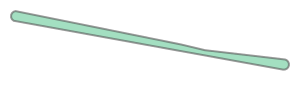

In [33]:
first_track

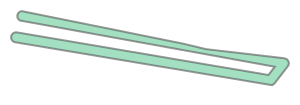

In [34]:
second_track

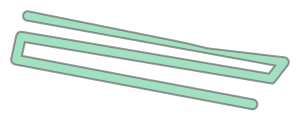

In [35]:
third_track

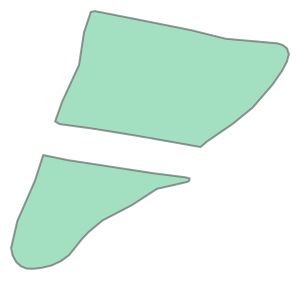

In [36]:
field_poly

In [37]:
first_track.area, field_poly.intersection(first_track).area, first_300['path_distance'][-1]

(2513.5612374436205, 2511.218132391109, 289.8753880753122)

In [38]:
second_track.area, field_poly.intersection(second_track).area

(5776.0170313265135, 5773.67392622807)

In [39]:
third_track.area, field_poly.intersection(third_track).area

(9000.1591825679, 8997.816077515787)

In [40]:
fourth_track.area, field_poly.intersection(fourth_track).area

(12086.76492776746, 12084.421822679724)

In [41]:
fifth_track.area, field_poly.intersection(fifth_track).area

(15038.75835704858, 15036.415251995822)

In [42]:
sixth_track.area, field_poly.intersection(sixth_track).area

(17923.317009383078, 17920.973904330705)

In [43]:
seventh_track.area, field_poly.intersection(seventh_track).area

(20547.362254572436, 20545.019149520173)

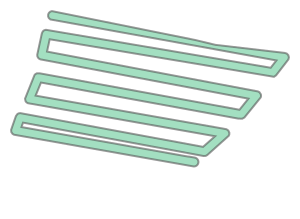

In [44]:
seventh_track

In [45]:
seventh_300['path_distance']

array([1712.39408315, 1729.31725627, 1729.36877437, 1729.98816492,
       1731.47079656, 1732.11890416, 1732.87086564, 1733.42422248,
       1734.52224121, 1735.20989101, 1735.8903747 , 1736.56623391,
       1737.39875116, 1738.14808504, 1738.88394594, 1739.53632685,
       1740.48692206, 1741.05461371, 1741.84256638, 1742.6253505 ,
       1743.36630101, 1744.23205164, 1744.93256666, 1745.57538696,
       1746.38038117, 1747.21323716, 1747.99646902, 1748.61727464,
       1749.26464623, 1750.05477394, 1751.07883638, 1751.53939041,
       1752.45263003, 1753.25415781, 1753.88118827, 1754.6055359 ,
       1755.47051787, 1756.10376966, 1756.82648634, 1757.71804013,
       1758.33747492, 1759.24344291, 1760.00447783, 1760.79184421,
       1761.38596839, 1762.11565241, 1762.83939618, 1763.66633701,
       1764.31150417, 1765.08274744, 1765.82073353, 1766.86009293,
       1767.54916002, 1768.32255764, 1768.97127805, 1769.67471431,
       1770.60991123, 1771.31785765, 1772.09250447, 1772.81523